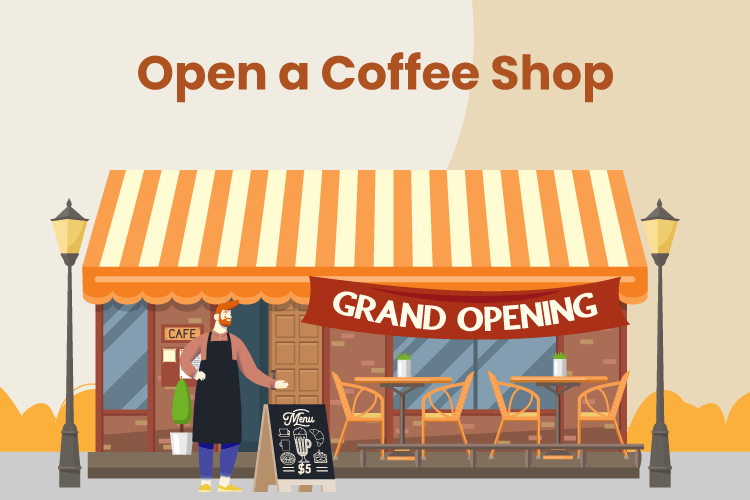

In [ ]:
!jupyter trust ./notebook.ipynb

Signing notebook: ./notebook.ipynb


# Where to open new coffee shops in Denver?

# ⭐ Introduction :        

This report suggests a data-driven strategy to figure out the best districts and locations to open new coffee shops in Denver which will attract customers , make profits and provide suitable environments for the growth of the shops .

The report answers on three key questions:

1- What are the best districts/neighborhoods to open new shops?

2- How to choose the neighborhoods with the highest proportion of people in the target demographic? 

3- How to prevent conflicts of interests between new stores and Starbucks stores?

In [ ]:
%%capture
!pip install geopandas

#import necessary libraries
import warnings
warnings.filterwarnings('ignore')
from shapely.geometry import Point, Polygon
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import random
from shapely.geometry import Point


# 💾 The data :
The information is from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado 
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

In [ ]:
#read Data
denver = pd.read_csv('./data/denver.csv')
denver.head() 

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77



#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood


In [ ]:
#read Data
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods.head()

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."


#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

In [ ]:
#read Data
census = pd.read_csv('./data/census.csv')
census.head()

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN


# 🔧 Methods:

- pandas dataframes & geogrphic pandas dataframe is used to store data  . 
- Folium Map is used to presentation the map and locations of starbucks stores, It is interactive map you can zoom in and out and press to location marker to see more information .

# 📊 Analysis :

## 1- Understand the problem:
As mentioned before, the task here is to find the best locations to open new coffee shops in denver , to do that it must be taken into account these three key points :   
 - Denver map and geographical **distribution of Starbucks cafe** shops in it .

 - The demographic distribution of the population in terms of the **age of the population**.

 - Demographic distribution of the population in terms of **income level**.

 - Denver **population density** .


## 2- Analysis Denver map and Starbucks shops locations:

The first step in analysis this data is to visual Denver's neighborhoods and the Starbucks store locations on the map to see and understand how and where starbucks stores distribute in Denver

🚩 Feel free to Swith Editer and interact with map 

In [ ]:

#df=neighborhoods["geometry"]
#df=pd.DataFrame(df,columns=["geometry"])

neighborhoods["cafe_in"]=False
#df["NBHD_NAME"]=np.nan 

#To plot the map , locations , neighborhoods
m = folium.Map(location=[39.74552,-105.00042], zoom_start=10.5, tiles='CartoDB positron')

#Polt the cafe location as a point & fill True to cafe_in if the neighborhood has a point inside
neighborhoods1=pd.DataFrame(neighborhoods)
for i in range(denver.shape[0]):
    lat = denver['Latitude'][i]
    lon = denver['Longitude'][i]
    popup = folium.Popup('area:<br>{}'.format(denver["Name"][i]),min_width=200, max_width=200)
    folium.Marker(location=[lat, lon],popup=popup).add_to(m)
    #folium.Marker(location=[lat, lon],popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)
    for j in range(0,neighborhoods1.shape[0]):
      h=neighborhoods1["geometry"][j]
      a=lon,lat
      a=Point(a)
      l=a.within(h)
      #print(neighborhoods1["NBHD_NAME"][i])
      #df["NBHD_NAME"][i]=neighborhoods1["NBHD_NAME"][i]
      if l==True:
        neighborhoods["cafe_in"][j]=True


#this to plot the neighborhoods 
for i, r in neighborhoods.iterrows():
    #print(r)
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    if neighborhoods["cafe_in"][i]==True :
      geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'color':'blue'})
    else:
      geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {"color":"red","fillcolor":"red"})

    geo_j.add_to(m)

m



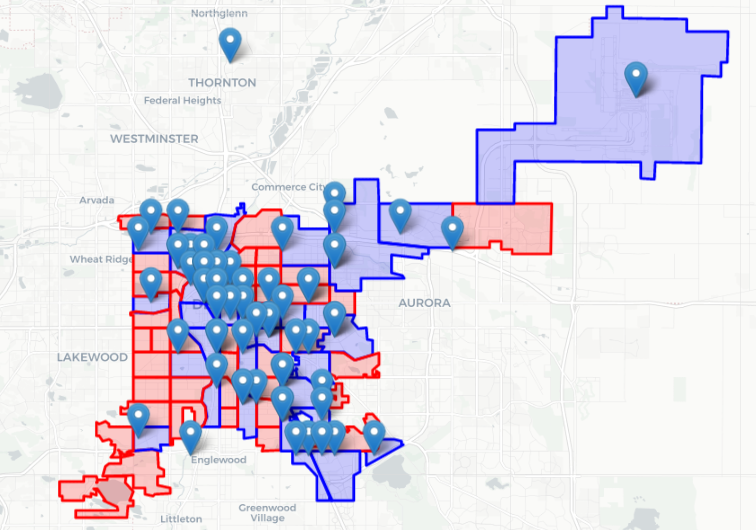

In [ ]:
print("Number of neighborhoods in denver",neighborhoods["NBHD_NAME"].unique().shape[0])


Number of neighborhoods in denver 78


### 🗾**Key points from the map :**

- The map above provides a clear geographical view of Denver map and the distribution of Starbucks shops over Denver neighborhoods.
- <font color="blue">Blue</font> polygons refer to neighborhoods which have Starbucks shops within them.
- <font color="blue">Blue</font> markers refer to the real location of the Starbucks shops, which when press them it gives the name of the street where the Starbucks shop is(when you switch editer) .
- While <font color="red">red</font> polygons refer to the neighborhoods which do not have Starbucks shops within them.

### ⚡**Key insights :**
* There are about seventy-eight neighborhoods in Denver.
* There lot of Starbucks stores in the central neighborhoods and very few stores in the neighborhoods far from the center, and we can also notice that some neighborhoods also have more than one store which maybe refer to high population rato.


## 3- Study youths population & conflict with Starbucks :

### **youths population :**
- Now it is time to study the distribution of youths in Denver,The age goal group  is approximately from 20s to 35s where these groups of people are the main customers of coffee, pastries, and sandwiches.

### **Conflict with Starbucks stores :**

- Second main factor is to avoid conflict with Starbucks stores, to avoid competing for the same customers and that is important for new shops to prevent such competing with famous brands ,that is to provide  a new environment to grow in so that the goal neighborhoods will be  which do not have any Starbucks store in.

In [ ]:
#to check if there is any duplicated values
# print(df["NBHD_NAME"].unique().shape)
# print(df.shape[0])
#To know how many nighborhoods have/haven't Starbucks shops within them
l=neighborhoods["cafe_in"].value_counts()
#print(l)

In [ ]:
#Merge Two DataFrames
nibor_census=neighborhoods.merge(census,on="NBHD_NAME")
#nibor_census.head()

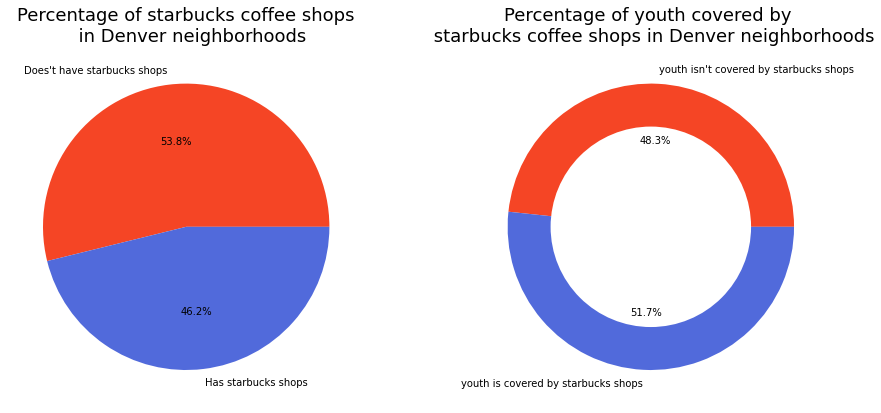

In [ ]:
fig = plt.figure(figsize=(12, 40)) # sets the size of the 4 plot with width as 10 and height as 10

ax1 = plt.subplot(1,2,1)

x = np.array([nibor_census[nibor_census["cafe_in"]==False].cafe_in.count(),nibor_census[nibor_census["cafe_in"]==True].cafe_in.count()])

mylabels = ["Does't have starbucks shops", "Has starbucks shops"]

plt.pie(x=x, autopct="%.1f%%", labels=mylabels, pctdistance=0.6,colors=["#F54525","#516ADB"])
ax1.set_title("Percentage of starbucks coffee shops\n  in Denver neighborhoods", fontsize=18);
plt.tight_layout(w_pad=10)

######################################
ax2 = plt.subplot(1,2,2)
x1= np.array([nibor_census[nibor_census["cafe_in"]==False]['AGE_18_TO_34'].sum(),nibor_census[nibor_census["cafe_in"]==True]['AGE_18_TO_34'].sum() ])

mylabels1 = ["youth isn't covered by starbucks shops", "youth is covered by starbucks shops"]
plt.pie(x=x1, autopct="%.1f%%", labels=mylabels1, pctdistance=0.6,colors=["#F54525","#516ADB"])
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)

ax2.set_title("Percentage of youth covered by \n starbucks coffee shops in Denver neighborhoods", fontsize=18);
plt.tight_layout(w_pad=10)


plt.show() # displays the plots

### ⚡ **Key Insights**:    
- There are 36 neighborhoods which have Starbucks shops within them with percent of 46.2% of the total number of Denver neighborhoods & these shops service at least **51.7 %**of youth in all over Denver as immediate costumers which they are not our focus.

- There are 42 neighborhoods which do not have Starbucks shops within them with percent of 53.8% and these neighborhoods have approximately **48.3%** as prospective customers of youths.


In [ ]:
#filtered by nighborhoods which do not have sturStarbucks shops
no_cafe_data=nibor_census[nibor_census["cafe_in"]==False]
#no_cafe_data.shape


## 4- Add Income as a main factor :

* To choose better prospective customers, prospective customers are filtered by their income level because the new coffee shops are high-quality and responsibly sourced and need to aim affluent households,so neighborhoods which do not have information about income are dropped out the focus.

In [ ]:
# filter by existing income information
no_cafe_yes_income=no_cafe_data[~no_cafe_data["NUM_HHLD_100K+"].isna()]
##
no_cafe_yes_income.reset_index(inplace=True)
no_cafe_yes_income.drop("index",axis=1,inplace=True)
#no_cafe_yes_income.head()

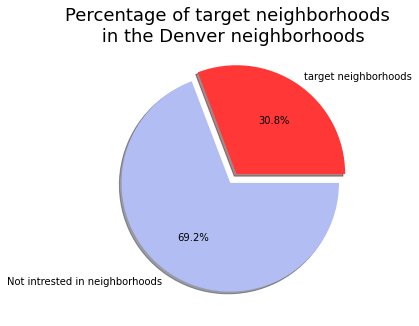

In [ ]:
#extarct the information
total_cofes=nibor_census["NBHD_NAME"].unique().shape[0]
goal_nighborhoods=no_cafe_yes_income.shape[0]

x= np.array([goal_nighborhoods,total_cofes-goal_nighborhoods])
# Create a pieplot
plt.figure(figsize=(5,5))

mylabels = ["target neighborhoods", "Not intrested in neighborhoods"]
plt.pie(x=x, autopct="%.1f%%", labels=mylabels, pctdistance=0.6,colors=["#FF3737","#B2BEF3"],explode = ( 0.1,  0),shadow=True )
#draw circle
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

plt.title("Percentage of target neighborhoods \n in the Denver neighborhoods", fontsize=18);
plt.show()

The chart above gives information about the target neighborhoods percentage which narrows the search circle to 30.8%, or 24 possible neighborhoods, this percentage is after filtering by: 
  - Youths population.
  - Conflict with Starbucks stores.
  - Existing of income information.

## 5-Put all together :

* To get a better view and help to make decision Neighborhoods are sorted based on income level and ages then plotted :

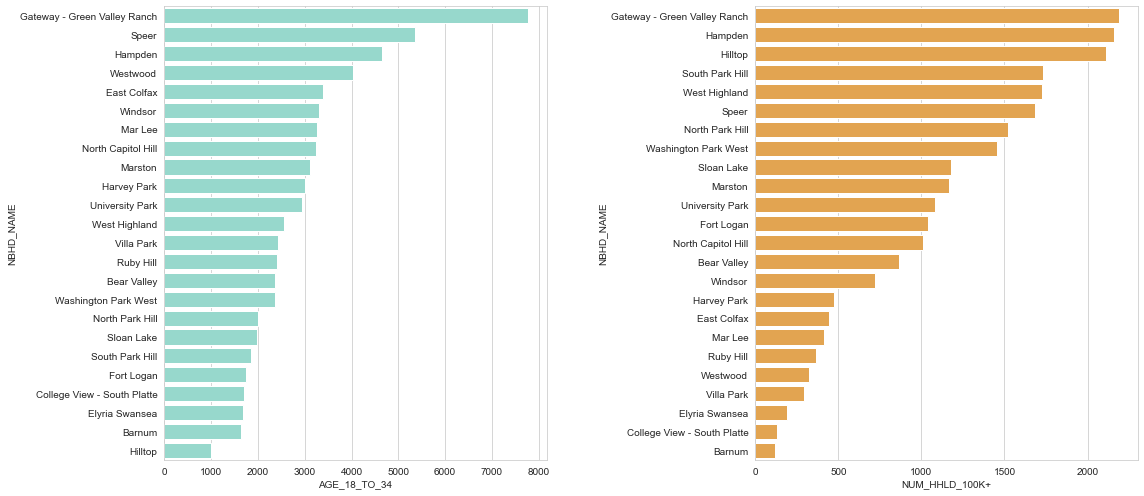

In [ ]:
fig = plt.figure(figsize=(16,7)) # sets the size of the 4 plot with width as 10 and height as 10

sns.set_style("whitegrid")
#First plot
ax1 = plt.subplot(1,2,1)
sns.barplot(y="NBHD_NAME",x="AGE_18_TO_34",data=no_cafe_yes_income,\
            order=no_cafe_yes_income.sort_values("AGE_18_TO_34",ascending = False).NBHD_NAME,color="#8CE3D3")
plt.tight_layout(w_pad=5)
#Second plot
ax2 = plt.subplot(1,2,2)
sns.barplot(y="NBHD_NAME",x="NUM_HHLD_100K+",data=no_cafe_yes_income,\
            order=no_cafe_yes_income.sort_values("NUM_HHLD_100K+",ascending = False).NBHD_NAME,color="#FAA839")
# #Third plot
# ax2 = plt.subplot(1,3,3)
# sns.barplot(y="NBHD_NAME",x="dis_nrst_point",data=no_cafe_yes_income,order=no_cafe_yes_income.sort_values("dis_nrst_point",ascending = False).NBHD_NAME)
plt.tight_layout(w_pad=5)

plt.show()

* New factor is added  which is the **distance between the center of the neighborhood and nearest Starbucks store**, it is added to ensure the furthest location from Starbucks stores in order to choose the neighborhoods least affected by Starbucks stores to avoid competing

In [ ]:
no_cafe_yes_income["dis_nrst_point"]=np.nan
no_cafe_yes_income["centroind"]=np.nan

#To add center and calculate distance between center and each starbucks store
for i in range(no_cafe_yes_income.shape[0]):
  p=no_cafe_yes_income["geometry"].loc[i].centroid.coords[0]
  p11,p22=float(p[0]),float(p[1])
  p1=Point(p11,p22)
  no_cafe_yes_income["centroind"].loc[i]=p1
  mini=1e10

  for j in range(denver.shape[0]):
      lat = denver.loc[j,'Latitude']
      lon = denver.loc[j,"Longitude"]
      a=lon,lat
      p2=Point(a)

      dista=p1.distance(p2)
      if dista < mini :
        mini=dista
  no_cafe_yes_income.loc[i,"dis_nrst_point"]=float(mini)
#to make all number in same scale
no_cafe_yes_income["dis_nrst_point"]=no_cafe_yes_income["dis_nrst_point"]*100000

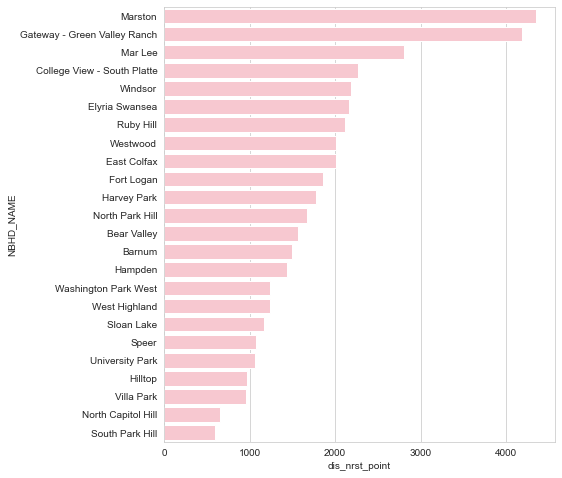

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(7,8))
sns.barplot(y="NBHD_NAME",x="dis_nrst_point",data=no_cafe_yes_income,order=no_cafe_yes_income.sort_values("dis_nrst_point",ascending = False).NBHD_NAME,color="pink")

plt.show()

It is time to extract the result and detect our three highly recommended neighborhoods: 
* There are three main factors to deal with in the selection process which are:

    1- youths Population density.

    2- Number of affluent households.

    3- Distance between neighborhood center and nearest Starbucks shop.

### **Selection Process:**

We have 24 neighborhoods to select three of them , based on the above three factores,

To involve these three factors in the process ,a level of importance will be assigned to each of them **( weight )** and a single value will be produced which is the **selection parameter**.

<font color="blue">selection parameter = weight_1*(youths Population density) +  weight_2*(Number of affluent households) + weight_3*(Distance between neighborhood center and nearest Starbucks shop)</font>

**Weights are :**    
-**30%** for youths Population density.

-**30%** for Number of affluent households.

-**40%** for Distance between neighborhood center and nearest Starbucks shop .


These weights were chosen to make best result .

In [ ]:
no_cafe_yes_income["selection_par"]=0.3*no_cafe_yes_income["AGE_18_TO_34"]+0.3*no_cafe_yes_income["NUM_HHLD_100K+"]+0.4*no_cafe_yes_income["dis_nrst_point"]

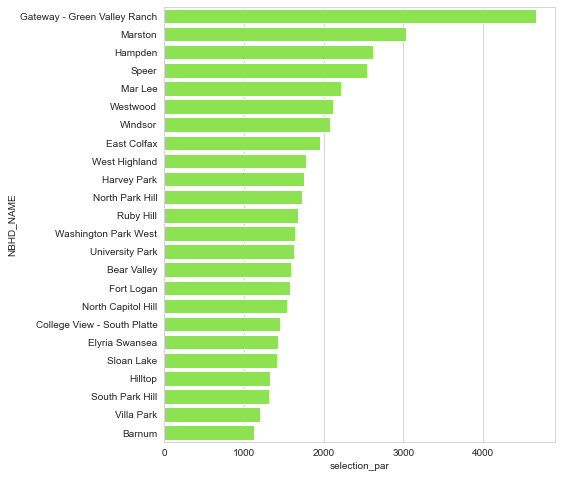

In [ ]:


plt.figure(figsize=(7,8))
sns.barplot(y="NBHD_NAME",x="selection_par",data=no_cafe_yes_income,color="#88FA39",order=no_cafe_yes_income.sort_values("selection_par",ascending = False).NBHD_NAME)

plt.show()

### plot final maps:

In [ ]:
#store the accepted nighborhoods
no_cafe_yes_income=no_cafe_yes_income.sort_values("selection_par",ascending = False,ignore_index=True)
accepted=pd.DataFrame()
for i in range(3):
  accepted=accepted.append(no_cafe_yes_income.loc[i])


In [ ]:
def generate_random(number, polygon):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
    
    return pnt

In [ ]:
#to plot the result map

m1 = folium.Map(location=[39.74552,-105.00042], zoom_start=10.5, tiles='CartoDB positron')

neighborhoods1=pd.DataFrame(neighborhoods)
for i in range(denver.shape[0]):
    lat = denver['Latitude'][i]
    lon = denver['Longitude'][i]
    #add points
    popup = folium.Popup('area:<br>{}'.format(denver["Name"][i]),min_width=200, max_width=200)
    folium.Marker(location=[lat, lon],popup=popup).add_to(m1)
    
    for j in range(0,neighborhoods1.shape[0]):
      h=neighborhoods1["geometry"][j]
      a=lon,lat
      a=Point(a)
      l=a.within(h)

#this to plot the neighborhoods 

for i, r in neighborhoods.iterrows():
    #print(r)
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()

    #if there is a cafe in this distric color it blue
    
    if neighborhoods["cafe_in"][i]==True :
      geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'color':'blue'})
    else:
        name= r['NBHD_NAME']

        #print(name) of chosen area
        if  name  in list(accepted["NBHD_NAME"]) :
            
            geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'color':'green'})

            #add marker
            point_=generate_random(1,r["geometry"])
            popup = folium.Popup('area:<br>{}'.format(name),min_width=200, max_width=200)
            #folium.Marker(location=[point_.y,point_.x],popup=popup, icon=folium.Icon(color='green')).add_to(m1)

        else:

          geo_j = folium.GeoJson(data=geo_j,
                              style_function=lambda x: {"color":"red","fillcolor":"red"})

    geo_j.add_to(m1)

m1

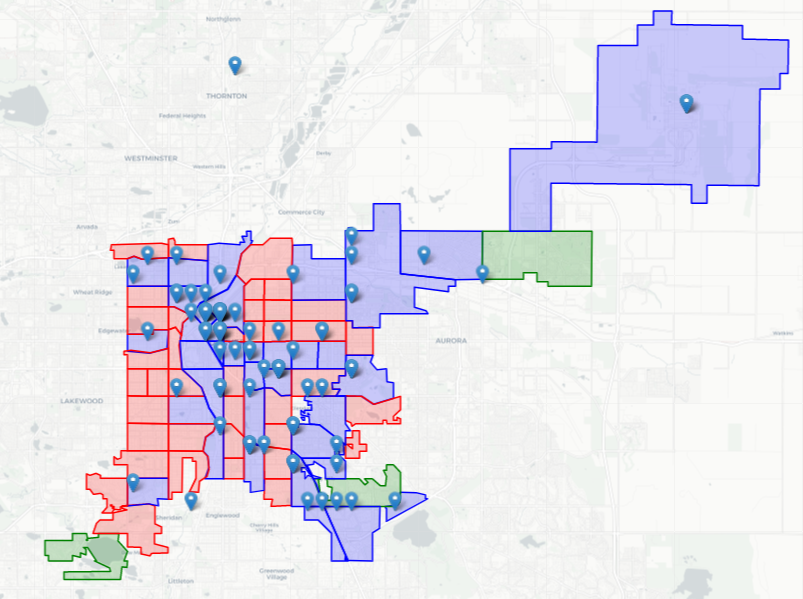

In [ ]:
#to plot the result map

m1 = folium.Map(location=[39.74552,-105.00042], zoom_start=10.5, tiles='CartoDB positron')


neighborhoods1=pd.DataFrame(neighborhoods)

for i in range(denver.shape[0]):
    lat = denver['Latitude'][i]
    lon = denver['Longitude'][i]
    #add points
    # popup = folium.Popup('area:<br>{}'.format(denver["Name"][i]),min_width=200, max_width=200)
    # folium.Marker(location=[lat, lon],popup=popup).add_to(m1)
    
    for j in range(0,neighborhoods1.shape[0]):
      h=neighborhoods1["geometry"][j]
      a=lon,lat
      a=Point(a)
      l=a.within(h)

#this to plot the neighborhoods 

for i, r in neighborhoods.iterrows():
    #print(r)
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()

    #if there is a cafe in this distric color it blue
    
    if neighborhoods["cafe_in"][i]==True :
      geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {"color":"blcak"})
    else:
        name= r['NBHD_NAME']

        #print(name) of chosen area
        if  name  in list(accepted["NBHD_NAME"]) :
            
            geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'color':'green'})

            #add marker
            point_=generate_random(1,r["geometry"])
            popup = folium.Popup('area:<br>{}'.format(name),min_width=200, max_width=200)
            #folium.Marker(location=[point_.y,point_.x],popup=popup, icon=folium.Icon(color='green')).add_to(m1)

        else:

          geo_j = folium.GeoJson(data=geo_j,
                              style_function=lambda x: {"color":"blcak"})

    geo_j.add_to(m1)

m1

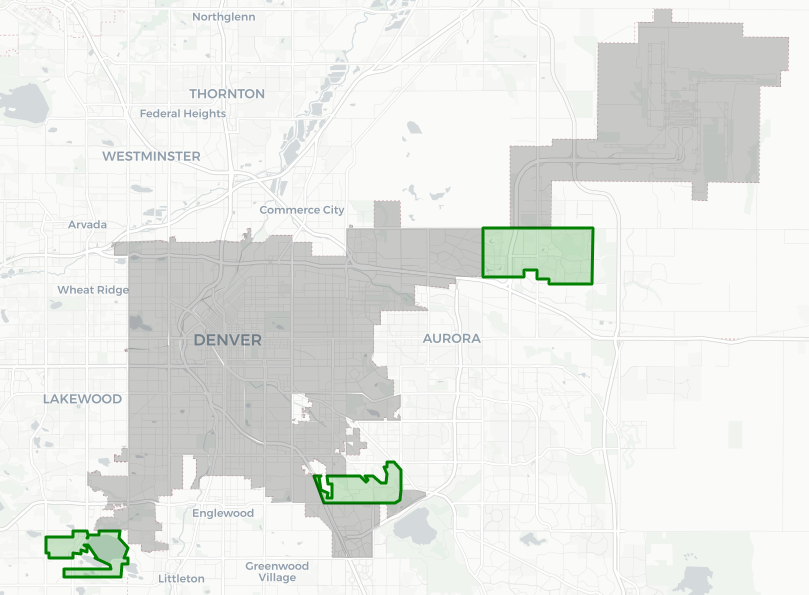

#### 🗾**Key points from the maps :**

These two maps provid the geographical information about the locations of final three goal neighborhoods where they are displayed as green polygons .

In [ ]:
print(accepted["NBHD_NAME"].values)

['Gateway - Green Valley Ranch' 'Marston' 'Hampden']


# 🎯 Conclusion & Discussion: 

As the final result of this analysis report, it is highly recommended to open your  new coffee shops in these neighborhoods: (which are ordered by their importance)

1- Gateway - Green Valley Ranch :    

- which has 7778 youths ,2192 affluent households ,far from nearest Starbucks shop about 4667 Meters

2- Marston

- which has 3119 youths ,1164 affluent households ,far from nearest Starbucks shop about 4353 Meters

3- Hampden

- which has 4655 youths ,2160 affluent households ,far from nearest Starbucks shop about 1431 Meters

⭕Finally the plots down display that these neighborhoods have  very good values compared with the mean of all Denver neighborhoods.

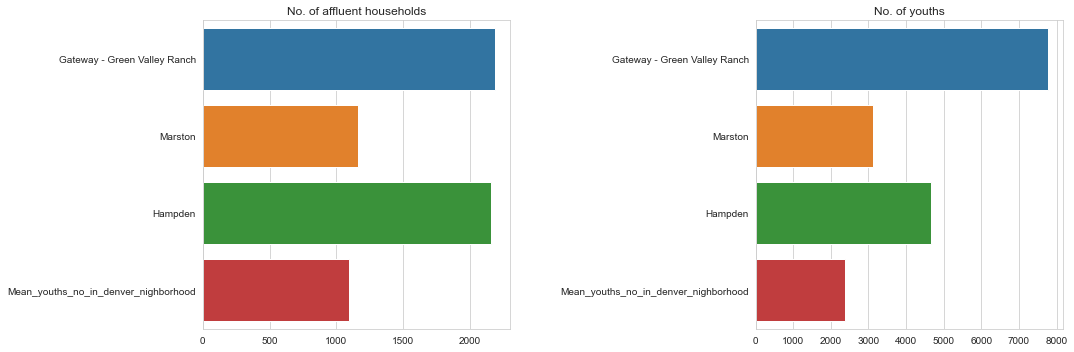

In [ ]:

fig = plt.figure(figsize=(15,5)) # sets the size of the 4 plot with width as 10 and height as 10

#First plot
ax1 = plt.subplot(1,2,1)
x=["Gateway - Green Valley Ranch","Marston","Hampden","Mean_youths_no_in_denver_nighborhood"]
y1=accepted["NUM_HHLD_100K+"].values
y = np.append(y1,nibor_census["NUM_HHLD_100K+"].mean())

sns.barplot(y=x,x=y)
ax1.set_title("No. of affluent households")

plt.tight_layout(w_pad=5)
#second plot
ax2 = plt.subplot(1,2,2)
x2=["Gateway - Green Valley Ranch","Marston","Hampden","Mean_youths_no_in_denver_nighborhood"]
y2=accepted["AGE_18_TO_34"].values
y12 = np.append(y2,nibor_census["AGE_18_TO_34"].mean())

ax2.set_title("No. of youths")

sns.barplot(y=x2,x=y12)
plt.tight_layout(w_pad=5)
plt.show()

Thank you , hope you enjoyed 🌝 